In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


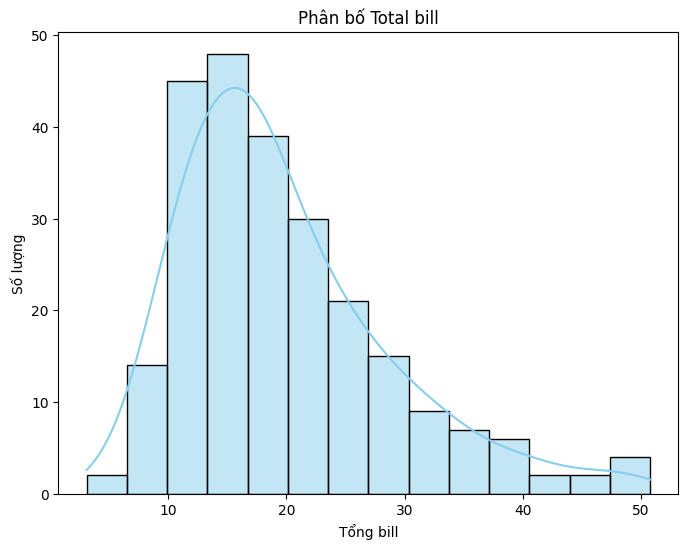

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(tips["total_bill"], kde=True, color="skyblue")
plt.title("Phân bố Total bill")
plt.xlabel("Tổng bill")
plt.ylabel("Số lượng")
plt.show()

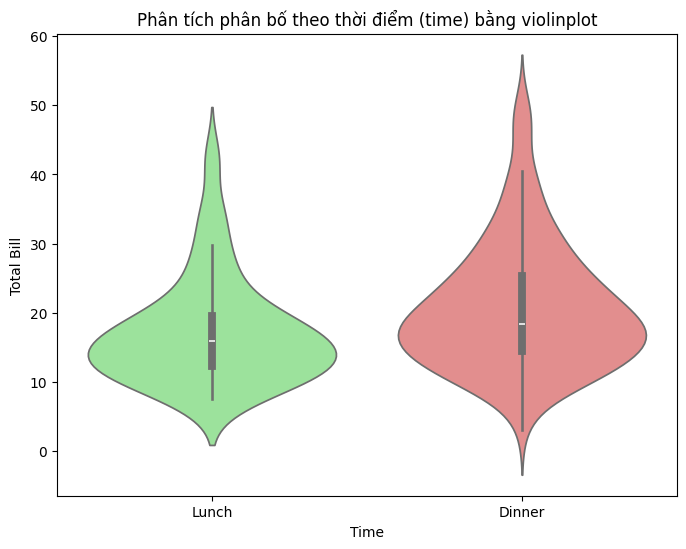

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=tips,
    x="time",
    y="total_bill",
    palette={"Dinner": "lightcoral", "Lunch": "lightgreen"},
    hue="time",
)
plt.title("Phân tích phân bố theo thời điểm (time) bằng violinplot")
plt.xlabel("Time")
plt.ylabel("Total Bill")
plt.show()

### Bài 2: Phân tích tương quan

In [23]:
diamonds = sns.load_dataset("diamonds")
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


<Figure size 800x600 with 0 Axes>

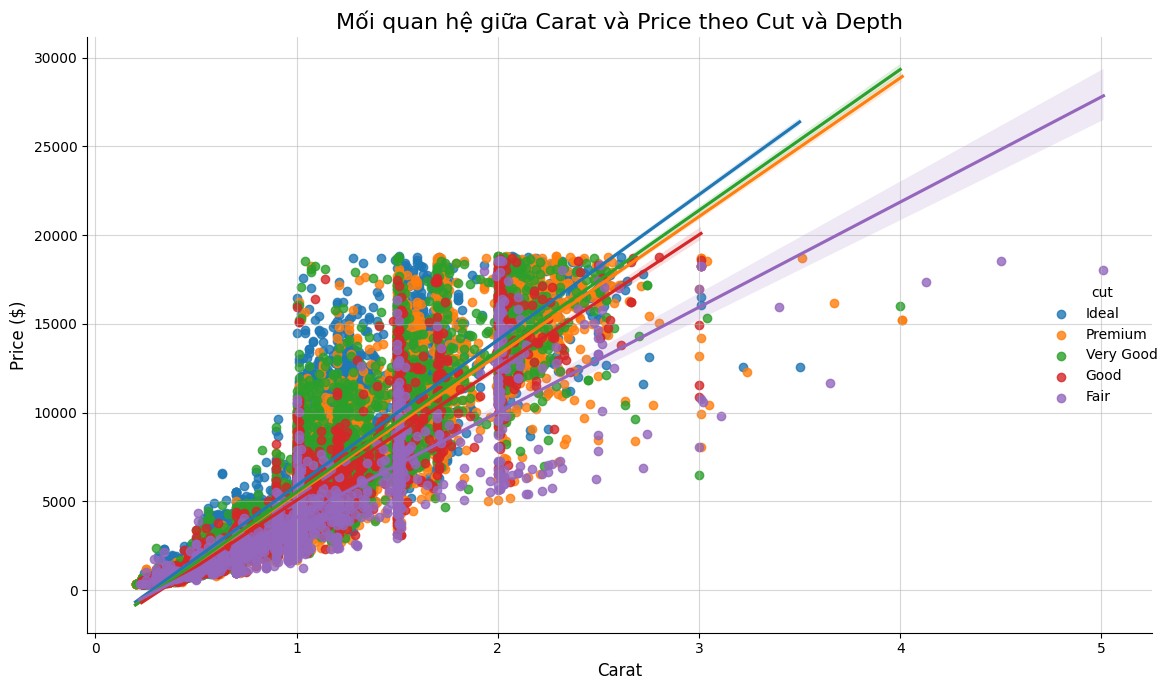

In [ ]:
plt.figure(figsize=(8, 6))
# Vẽ scatterplot carat vs price, hue theo cut
sns.scatterplot(x="carat", y="price", hue="cut", size="depth", data=diamonds, alpha=0.7)
# Thêm regression line cho từng nhóm cut
sns.lmplot(x="carat", y="price", hue="cut", data=diamonds, height=7, aspect=1.5)

plt.title("Mối quan hệ giữa Carat và Price theo Cut và Depth", fontsize=16)
plt.xlabel("Carat", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

### Bài 3: Heatmap và FacetGrid

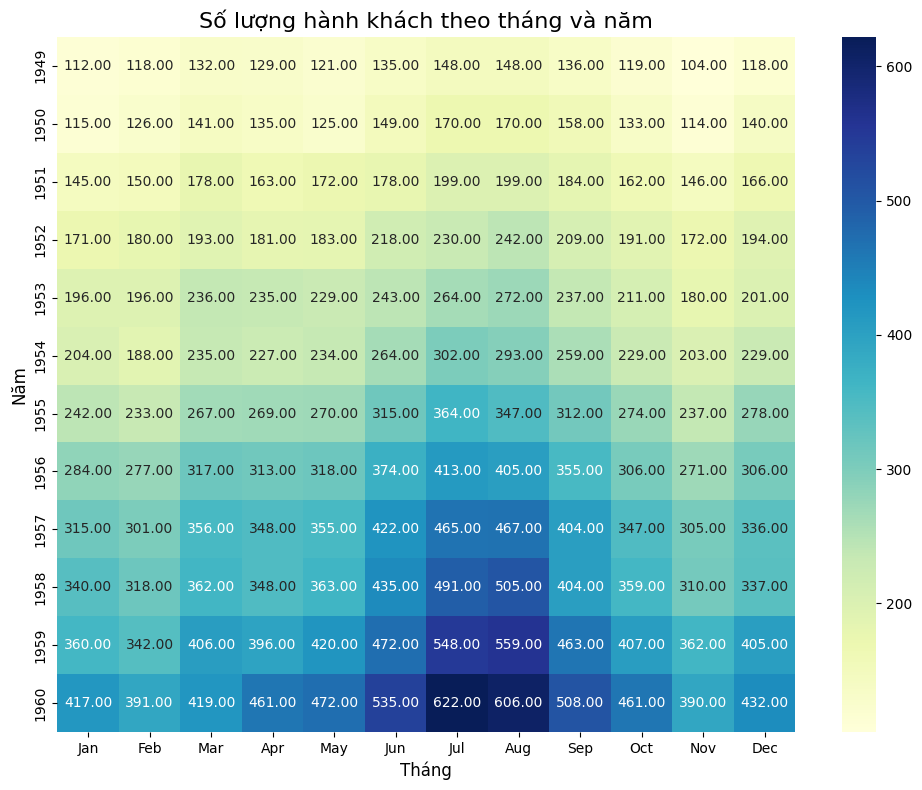

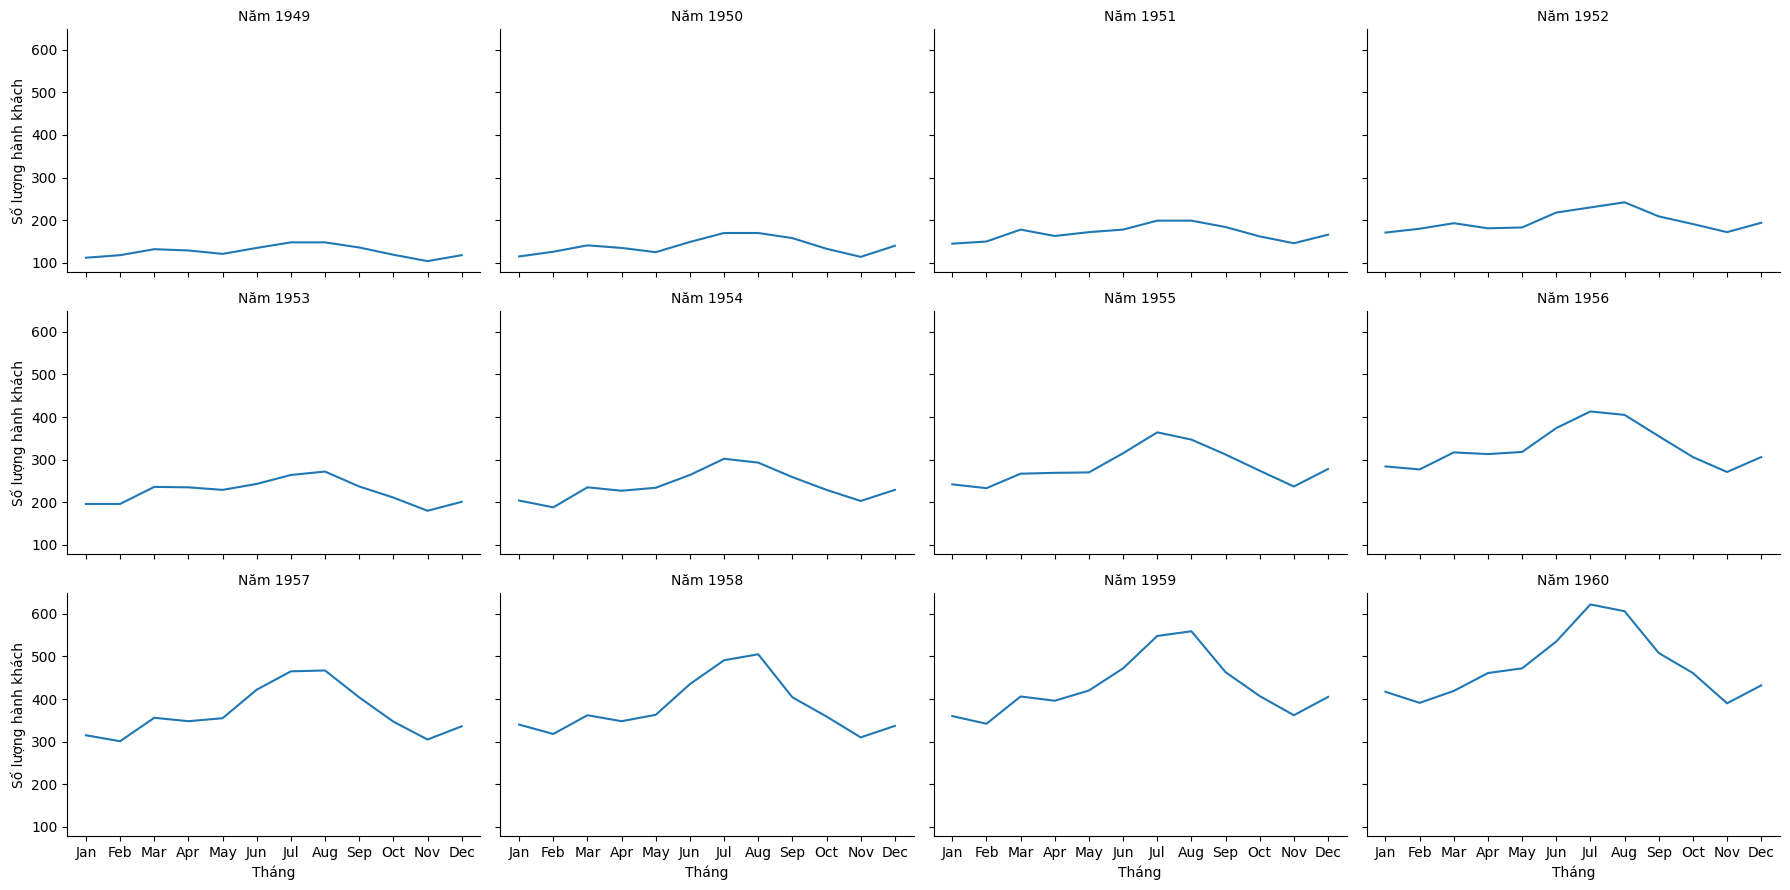

In [31]:
flights = sns.load_dataset("flights")

# Chuyển dữ liệu thành dạng pivot table (year làm index, month làm columns)
flights_pivot = flights.pivot_table(index="year", columns="month", values="passengers", observed=True)

# Vẽ heatmap thể hiện số lượng hành khách theo tháng/năm
plt.figure(figsize=(10, 8))
sns.heatmap(flights_pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Số lượng hành khách theo tháng và năm", fontsize=16)
plt.xlabel("Tháng", fontsize=12)
plt.ylabel("Năm", fontsize=12)
plt.tight_layout()
plt.show()

# Sử dụng FacetGrid để phân tích trend theo năm
g = sns.FacetGrid(flights, col="year", col_wrap=4, height=3, aspect=1.5)
g.map(sns.lineplot, "month", "passengers")
g.set_titles("Năm {col_name}")
g.set_axis_labels("Tháng", "Số lượng hành khách")
g.tight_layout()
plt.show()